In [1]:
### This is a simple script formatting the PC9 data to data preprocessing
# Author: Yiyun
import pandas as pd
import os
import shutil

***
### Drop PC9 in 19Q3

In [4]:
### q3 and q4 input and output folder path
q3_dir = '../data/DepMap/19Q3'
q4_dir = '../data/DepMap/19Q4'

out_q3_dir = '../data/DepMap_DROP_PC9/19Q3'
out_q4_dir = '../data/DepMap_DROP_PC9/19Q4'
if not os.path.exists(out_q3_dir):
    shutil.copytree(q3_dir,out_q3_dir)
if not os.path.exists(out_q4_dir):
    shutil.copytree(q4_dir,out_q4_dir)

In [5]:
# Read 19Q3 and 19Q4 file, use column names as reference for genes 
df_ref19q3 = pd.read_csv(os.path.join(q3_dir,'Achilles_gene_effect.csv'), index_col = 0)
df_ref19q4 = pd.read_csv(os.path.join(q4_dir,'Achilles_gene_effect.csv'), index_col = 0)

In [6]:
# Delete PC9 data from gene effect file
df_ref19q3_m = df_ref19q3.drop(['ACH-000030'])
df_ref19q4_m = df_ref19q4.drop(['ACH-000030'])

In [7]:
# Save file
# df_ref19q3_m.to_csv(os.path.join(out_q3_dir,'Achilles_gene_effect.csv'), sep = ',')
# df_ref19q4_m.to_csv(os.path.join(out_q4_dir,'Achilles_gene_effect.csv'), sep = ',')

***
### Format external data as q3 input

In [7]:
### Read files
# Need to read 19Q3 files for mapping the gene name + gene code
q3_dir = '../data/DepMap/19Q3'
q4_dir = '../data/DepMap/19Q4'
skmel28_dir = '../data/ceres_external/SKMEL28'
colo704_dir = '../data/ceres_external/COLO704'
pc9_dir = '../data/ceres_external/PC9_corrected'
to_dir = '../data/ceres_external/To'


df_ref19q3 = pd.read_csv(os.path.join(q3_dir,'Achilles_gene_effect.csv'), index_col = 0)
df_pc9 = pd.read_csv(os.path.join(pc9_dir,'BatchCorrectedPritchard.csv'), index_col = 0)
df_to = pd.read_csv(os.path.join(to_dir,'ToCellCERES.csv'), index_col = 0)
df_colo704 = pd.read_csv(os.path.join(colo704_dir,'COLO704_CERES.csv'), index_col = 0)
df_skmel28 = pd.read_csv(os.path.join(skmel28_dir,'SKMEL28_CERES.csv'), index_col = 0)

In [9]:
### Assign random cell line names and transpose the dataframe to let columns be genes
df_pc9.columns = ['ACH-000113'] # Assign a random ID for PC9
df_pc9= df_pc9.T
df_to.columns = ['ACH-000113','ACH-000067','ACH-000070','ACH-000075',\
                 'ACH-000108','ACH-000228','ACH-000233','ACH-000414']
df_to= df_to.T

In [8]:
df_colo704.columns = ['ACH-000113']
df_skmel28.columns = ['ACH-000113']
df_colo704= df_colo704.T
df_skmel28= df_skmel28.T

In [ ]:
### Map 19q3 column names to PC9 and To data
# Create dictionary for gene names and id in 19Q3 file
dict_code = {}
for i in range(0, len(df_ref19q3.T)):
    name,idx = df_ref19q3.columns[i].split(' ')[0:2]
    if name not in dict_code:
        dict_code[name] = idx

# Map gene in PC9 and To data
def map_gene_names(df):
    global dict_code
    for names in df.columns:
        if names in dict_code:
            new_name = names + ' ' + dict_code[names]
            df.rename(columns = {names:new_name}, inplace = True)
        else:
            print(names)
            df = df.drop(columns=[names])
    
    df = df.dropna(axis = 1)
    return df

# df_pc9 = map_gene_names(df_pc9)
# df_to = map_gene_names(df_to)
df_colo704 = map_gene_names(df_colo704)
df_skmel28 = map_gene_names(df_skmel28)

In [9]:
# df_pc9.to_csv(os.path.join(pc9_dir,'gene_effect.csv'), sep = ',')
# df_to.to_csv(os.path.join(to_dir,'gene_effect.csv'), sep = ',')
# df_skmel28.to_csv(os.path.join(skmel28_dir,'gene_effect.csv'), sep = ',')
# df_colo704.to_csv(os.path.join(colo704_dir,'gene_effect.csv'), sep = ',')

***
### L200 standalone score

In [11]:
### Read the l200 standalone gene and score
pc9_dir = '../data/ceres_external/PC9_corrected'
df_l200 = pd.read_csv(os.path.join(pc9_dir,'PC9AvL200_CERES.csv'))

In [12]:
df_l200.columns = ['landmark','PC9.1','PC9.2','mean','gene.type','scaled.score']

In [13]:
### Assign gene id
### q3 and q4 input and output folder path
q3_dir = '../data/DepMap/19Q3'
q4_dir = '../data/DepMap/19Q4'
    
# Read 19Q3 and 19Q4 file, use column names as reference for genes 
df_ref19q3 = pd.read_csv(os.path.join(q3_dir,'Achilles_gene_effect.csv'), index_col = 0)
df_ref19q4 = pd.read_csv(os.path.join(q4_dir,'Achilles_gene_effect.csv'), index_col = 0)
### map gene id to gene name
dict_code = {}
for i in range(0, len(df_ref19q3.T)):
    name,idx = df_ref19q3.columns[i].split(' ')[0:2]
    if name not in dict_code:
        dict_code[name] = idx

In [14]:
# Map gene id to gene
for i in range(0,len(df_l200)):
    name = df_l200.loc[i,'landmark']
    if name in dict_code:
        new_name = name + ' ' + dict_code[name]
        df_l200.loc[i,'landmark'] = new_name
    else:
        print(name)
        df_l200 = df_l200.drop(i)
df_l200 = df_l200.reset_index(drop = True)

KIAA0907
HIAT1
PTPLB
NUDT4
NPIPB5
FAM21C
ATP5I
KIAA1279


In [16]:
### Create stand alone l200 q3q4 file
out_q3_dir = '../data/DepMap_DROP_PC9/19Q3'
out_q4_dir = '../data/DepMap_DROP_PC9/19Q4'

standalone_q3_dir = '../data/DepMap_PC9_Standalonel200/19Q3'
standalone_q4_dir = '../data/DepMap_PC9_Standalonel200/19Q4'
if not os.path.exists(standalone_q3_dir):
    shutil.copytree(out_q3_dir,standalone_q3_dir)
if not os.path.exists(standalone_q4_dir):
    shutil.copytree(out_q4_dir,standalone_q4_dir)
### Change gene names in 19q3 and 14(dropped pc9) -- read data
df_q3 = pd.read_csv(os.path.join(standalone_q3_dir,'Achilles_gene_effect.csv'), index_col = 0)
df_q4 = pd.read_csv(os.path.join(standalone_q4_dir,'Achilles_gene_effect.csv'), index_col = 0)

In [14]:
### Change gene names in 19q3 and 14(dropped pc9) -- read data
for i in range(0,len(df_l200)):
    name = df_l200.loc[i,'landmark']
    score = df_l200.loc[i,'scaled.score']
    df_q3.loc['ACH-000113',name] = score
    df_q4.loc['ACH-000113',name] = score

In [ ]:
# Save file
# df_q3.to_csv(os.path.join(standalone_q3_dir,'Achilles_gene_effect.csv'), sep = ',')
# df_q4.to_csv(os.path.join(standalone_q4_dir,'Achilles_gene_effect.csv'), sep = ',')

In [21]:
### For compare original l200 and standalone l200
for i in range(0,len(df_l200)):
    name = df_l200.loc[i,'landmark']
    score_q3 = df_ref19q3.loc['ACH-000113',name]
    df_l200.loc[i,'q3.score'] = score_q3

In [23]:
import pandas as pd
from os.path import join
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import r2_score
import numpy as np
from matplotlib_venn import venn2
from scipy.stats import gaussian_kde

In [24]:
df_l200

,landmark,PC9.1,PC9.2,mean,gene.type,scaled.score,q3.score
0,C8orf33 (65265),0.035669,0.023740,0.029705,cond.ess,-0.338620,-0.479853
1,CDC25A (993),0.379579,0.230819,0.305199,cond.ess,-0.198675,-0.238549
2,DNM1L (10059),-1.413506,-1.355609,-1.384558,essntl,-1.057037,-0.773638
3,SNAPC3 (6619),-1.952913,-1.548754,-1.750833,essntl,-1.243098,-1.189180
4,KLF4 (9314),0.539209,0.305948,0.422579,cond.ess,-0.139048,-0.056916
...,...,...,...,...,...,...,...
186,ADNP (23394),1.487091,1.296611,1.391851,cond.ess,0.353323,-0.611680
187,FRA10AC1 (118924),0.330606,0.228484,0.279545,cond.ess,-0.211706,0.252767
188,MIB1 (57534),0.221647,0.262249,0.241948,cond.ess,-0.230805,0.001649
189,NAIP (4671),-0.324782,0.133451,-0.095666,cond.ess,-0.402306,-0.181346


Text(0, 0.5, 'Q3')

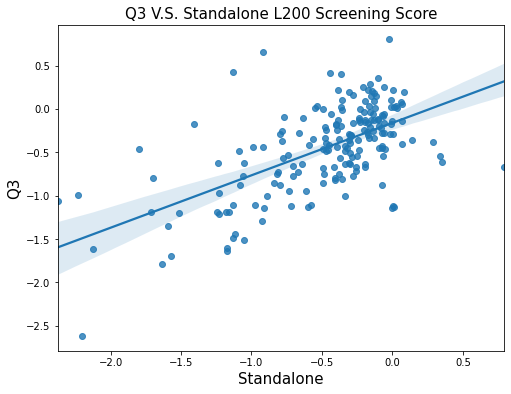

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ax = sns.regplot(x='scaled.score', y='q3.score',data = df_l200)
# corr_pear = pearsonr(df_pc9['actual'], df_pc9['predicted'])[0]
# corr_spear = spearmanr(df_pc9['actual'], df_pc9['predicted'])[0]
# ax.text(0.05,0.95,'rho = '+str(corr_pear),transform=ax.transAxes,fontsize = 8) #add text
ax.set_title('Q3 V.S. Standalone L200 Screening Score', fontsize = 15)
ax.set_xlabel('Standalone', fontsize=15);ax.set_ylabel('Q3', fontsize=15)